# Decision Trees

(Agradecimientos a Pavlos Protopapas (Harvard U.), Manuel Pérez y Guille Cabrera (UdeC))


Recordando, la regresión logística para clasificación funciona mucho mejor cuando las clases se encuentran bien separadas dentro del espacio de características (feature space) y el límite de decisión (decision boundary) puede ser definido por una ecuación:

$f(x1,...,xJ) = 0$


El siguiente es un dataset tipico para regresión logistica con un límite de decisión lineal: 


<img src="https://www.cntk.ai/jup/cancer_classify_plot.jpg">

Mientras los modelos de regresión logística con límites de decisión lineales son intuitivos y fáciles de interpretar al observar el límite de decisión de cada predictor, es muy dificil de interpretar limites de decisión no lineales:


$(x_{3} +2x_{2})^{2} −x_{1} +10 = 0$


Sería deseable construir modelos con límites de decisión complejos que también sean fáciles de interpretar, pues como humanos, siempre intentamos buscar modelos interpretables para diferenciar entre clases de objetos y fenómenos:

<img src="http://dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png">


Resulta que los diagramas de flujo simples como el del ejemplo, pueden formularse como modelos matemáticos para la clasificación y estos modelos tienen las propiedades que deseamos:
1. Interpretabilidad
2. Límites de decisión más complejos
3. Límites de decisión localmente lineales, donde cada componente del limite de decisión es simple de describir matemáticamente.


La idea detrás de los árboles de regresión es dividir iterativamente el espacio de coordenadas linealmente en diferentes regiones. Asociamos un número real a cada hoja del árbol. El valor de cada hoja se obtiene al minimizar el error al cuadrado

$\hat{f}(x) = \mathrm{argmin}_y\sum_{i|x_i\in R(x)}(y-y_i)^2$, donde $R(x)$ es la región (u hoja) donde $x$ miente. 
Optimizando esa expresión simple, se puede demostrar que el valor regresivo constante para cada región es solo el promedio de los valores $y_i$ de las instancias que caen en esa región.

<img src = images/TreeRegression.png/>

Dado un arbol $T$, la suma cuadrada de los errores es:
\begin{equation}
S = \sum_{c\in\mathrm{leaves}(T)}\sum_{i\in c} (y_i - m_c)^2.
\end{equation}

Cada nodo es determinado dividiendo el espacio coordenado en el sentido que se minimize el error.

#### Algoritmo:

* Empezar con un único nodo que contiene todos los puntos. Calcular $m_c$ (espacio) and $S$ (error).
* Si (todos los puntos en el nodo tienen el mismo valor para todas las variables independientes):
  * stop
* Sino:
  * buscar sobre todas las divisiones binarias de todas las variables, tal que estas reduzcan $S$ tanto como sea posible. 
  * Si (la mayor disminución en $ S $ es menor que algún umbral $ \ delta $) o (uno de los nodos resultantes
Contiene menos de $ q $ puntos)
    * stop
  * Sino:
    * Tomar esa división y crear dos nuevos nodos.
  * Para cada nuevo nodo:
      Repetir el procedimiento

# The wine aficionado

¿Puede un productor de vino predecir cómo se recibirá un vino en función de las propiedades químicas de éste? ¿Hay indicadores químicos que se correlacionen más fuertemente con la "calidad" percibida de un vino?

Examinamos el conjunto de datos de calidad del vino alojado en el <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality"> sitio web de UCI </a>. Estos datos registran 11 propiedades químicas (como las concentraciones de azúcar, ácido cítrico, alcohol, pH, etc.) de miles de vinos tintos y blancos del norte de Portugal, así como la calidad de los vinos, registrados en una escala del 1 al 10. En este problema, solo veremos los datos de vino tinto.

<img src="http://www.winemaniacs.com/wp-content/uploads/2013/04/WineRotator-2000x925.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


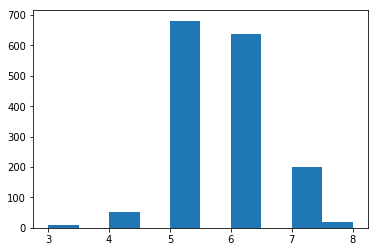

In [2]:
print(df.shape)
plt.hist(df.quality)
plt.show()


Utilizaremos la columna de calidad como nuestra variable objetivo. Excepto que simplificaremos el problema a un mundo binario en el que los vinos son "malos" (puntuación <7 puntuación <7) o "buena" (puntuación> 7) puntuación≥7). Por ejemplo, si originalmente Y = [1,3,8,4,7] Y = [1,3,8,4,7], el nuevo YY debería ser [0,0,1,0,1] [0 , 0,1,0,1].

In [3]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1.

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


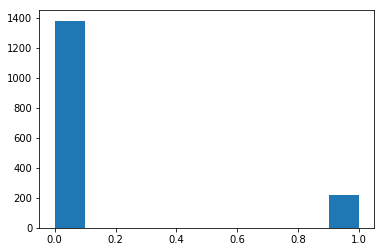

In [4]:
plt.hist(df.target)
plt.show()

Tenemos un problema en el cual las clases están desbalanceadas, por lo cual una buena medida de error puede ser 
f1-score. Recordando:

donde $TP$=True Positive, $FN$= False Negative...etc

**recall**
$$\text{recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$
**precision**
$$\text{precision} = \frac{TP}{TP+FP}.$$
F1-Score es la combinación entre ambas medidas de error:
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$



### Interpretación de un árbol de decisión

Construir un árbol de decisiones no es mucho más difícil que leer uno, aquí está el resumen esencial:

Digamos que estamos construyendo un árbol de clasificación al considerar una lista de predictores. En nuestro ejemplo anterior, queremos poder clasificar los buenos vinos del resto usando cosas como la acidez fija, el pH, el alcohol, etc. Todas estas son variables continuas, genéricamente las llamaremos $ X_{i1}, X_{i2},. .., X_{ip} $ ($ i $ para vino, $ p $ para predictores). También tenemos una etiqueta observada $ Y_i $ por cada vino.

Primero asignamos a todos a la misma clase, digamos $ \hat{Y_i} = 1 $. Podemos calcular el error al cuadrado $ Err = \sum_i {(\hat{Y_i} - Y_i) ^ 2} $

- En ** cada paso ** del algoritmo, consideramos una lista de posibles decisiones (o divisiones), por ejemplo, $ X_{10}> 12 $, es decir, el contenido de alcohol es superior al 12%.
- Para cada decisión posible recalculamos el predictor para esa regla, por ejemplo $ \hat{Y_i} = 1 $ si $ X_ {10}> 12 $ y $ 0 $ de lo contrario.
- Recalculamos el error para cada posible decisión: $ Err = \sum_i {(\hat{Y_i} - Y_i) ^ 2} $
- Elegimos la decisión que reduce el error por la cantidad más grande
- Entonces sigue ...

In [5]:
from IPython.display import Image
import pydotplus
import io
from sklearn.tree import export_graphviz
from StringIO import StringIO

# https://github.com/JWarmenhoven/ISLR-python
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = io.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

ModuleNotFoundError: No module named 'pydotplus'

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


subdf=df[['sulphates', 'fixed acidity']]
X=subdf.values
Y=df['target'].values

clfTree1 = DecisionTreeClassifier(max_depth=3, criterion='gini')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=77)

clf=clfTree1.fit(Xtrain, ytrain)

training_score = f1_score(clf.predict(Xtrain), ytrain)
test_score = f1_score(clf.predict(Xtest), ytest)
print("f1-score en el set de entrenamiento: %0.2f" % (training_score))
print("f1-score en el set de prueba:     %0.2f" % (test_score))
print(confusion_matrix(ytest, clf.predict(Xtest)))

f1-score en el set de entrenamiento: 0.07
f1-score en el set de prueba:     0.05
[[409   0]
 [ 69   2]]


In [108]:
#graph3 = print_tree(clf, features=['alcohol', 'sulphates'], class_names=['No', 'Yes'])
#Image(graph3.create_png())

<img src = images/Tree.png>

# Random Forest Classifier


Random Forest funciona al agregar los resultados de una serie de árboles de decisión alterados aleatoriamente construidos para explicar los datos.

### Un poco de bootstrap aggregation

La idea de Random Forest surge de manera natural al considerar un Tree bagging. En Tree bagging hacemos lo siguiente $ b $ veces:

1. Tomar una submuestra aleatoria de los datos.
2. Construir un arbol de clasificación (regresión) como en la sección previa
3. Repetir

Para un nuevo dato, podemos simplemente ejecutar ese punto a través de todos los árboles $ b $ construidos, obtener todas las decisiones $ \hat{Y_1}, ..., \hat{Y_b} $ y obtener la mayoría de los votos. Esta forma de promediar elimina algunos de los problemas de ajuste que se encuentran en el uso de un solo árbol. Además, ajustar estos árboles cuesta mucho computacionalmente, entonces, ¿qué más podemos hacer?


### Random Forests
Este método es muy similar al método de agregación bootstrap. Sin embargo, como su nombre indica, se inyecta algo de aleatoriedad adicional en la construcción de los árboles. Resulta que los árboles que se construyen a partir de la submuestra aleatoria de sus datos son bastante similares, por lo que la solución es bastante simple. En Random Forests hacemos los siguientes $ b $ veces:

1. Tomar una submuestra aleatoria de los datos.
2. Elegir aleatoriamente un numero de predictores a ser utilizados en la construcción del árbol.
3. Construir un árbol de clasificación (o regresión) sólo con las variables seleccionadas en 2.
4. Repetir


In [7]:
from sklearn.ensemble import RandomForestClassifier



clfForest = RandomForestClassifier(n_estimators=10, oob_score=True, max_features='auto')
clf=clfForest.fit(Xtrain, ytrain)

training_score = f1_score(clf.predict(Xtrain), ytrain)
test_score = f1_score(clf.predict(Xtest), ytest)
print("f1-score en el set de entrenamiento: %0.2f" % (training_score))
print("f1-score en el set de prueba:     %0.2f" % (test_score))
print(confusion_matrix(ytest, clf.predict(Xtest)))

f1-score en el set de entrenamiento: 0.85
f1-score en el set de prueba:     0.35
[[389  20]
 [ 52  19]]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# Con todas las variables:

In [8]:
Y = df['quality'].values
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df.loc[:, :'alcohol'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=77)

In [9]:
clfTree1 = DecisionTreeClassifier(max_depth=3, criterion='gini')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=77)

clf = clfTree1.fit(Xtrain, ytrain)

training_score = f1_score(clf.predict(Xtrain), ytrain)
test_score = f1_score(clf.predict(Xtest), ytest)
print("f1-score en el set de entrenamiento: %0.2f" % (training_score))
print("f1-score en el set de prueba:     %0.2f" % (test_score))
print(confusion_matrix(ytest, clf.predict(Xtest)))

f1-score en el set de entrenamiento: 0.45
f1-score en el set de prueba:     0.49
[[403   6]
 [ 46  25]]


In [10]:
clfForest = RandomForestClassifier(n_estimators=10, oob_score=True, max_features='auto')
clf=clfForest.fit(Xtrain, ytrain)

training_score = f1_score(clf.predict(Xtrain), ytrain)
test_score = f1_score(clf.predict(Xtest), ytest)
print("f1-score en el set de entrenamiento: %0.2f" % (training_score))
print("f1-score en el set de prueba:     %0.2f" % (test_score))
print(confusion_matrix(ytest, clf.predict(Xtest)))

f1-score en el set de entrenamiento: 0.98
f1-score en el set de prueba:     0.40
[[403   6]
 [ 52  19]]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# Podemos Mejorarlo más?

Run this, but carefully pal!

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
from pprint import pprint
# Look at parameters used by our current forest
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

In [ ]:
rf_random.best_params_

In [ ]:
training_score = f1_score(rf_random.predict(Xtrain), ytrain)
test_score = f1_score(rf_random.predict(Xtest), ytest)
print("f1-score en el set de entrenamiento: %0.2f" % (training_score))
print("f1-score en el set de prueba:     %0.2f" % (test_score))
print(confusion_matrix(ytest, rf_random.predict(Xtest)))